In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np

"""**El siguiente código descarga el conjunto de datos IMDB a su máquina (o utiliza una copia en caché si ya lo ha descargado):**"""

imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


El conjunto de datos IMDB proporcionado por Keras está preprocesado: 
- <b>Tokenización </b>:  Las palabras en cada revisión se convierten en secuencias de números enteros, donde cada número entero representa una palabra en el vocabulario.
- <b>Limitación del tamaño del vocabulario </b>: num_words=1000 ->  solo se consideran las 10,000 palabras más frecuentes en el conjunto de datos. Las palabras menos frecuentes se reemplazan con un token especial (?)

In [2]:
print("Training entries: {}, Test Data: {}".format(len(train_data), len(test_data)))

"""**El texto de las reseñas se ha convertido en números enteros, donde cada número entero representa una palabra específica en un diccionario. Este es el aspecto de la primera reseña:**"""
print(train_data[0])

"""*Las reseñas de las películas pueden tener distintas longitudes. El código siguiente muestra el número de palabras de la primera y la segunda crítica. Dado que las entradas de una red neuronal deben tener la misma longitud, tendremos que resolver esto más adelante.*"""

len(train_data[0]), len(train_data[1])

Training entries: 25000, Test Data: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


(218, 189)

In [3]:
"""Volver a convertir los números enteros en palabras

Puede ser útil saber cómo volver a convertir enteros en texto. Aquí, crearemos una función de ayuda para consultar un objeto diccionario que contenga el mapeo de entero a cadena:
"""

word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

"""Utilizar la función decode_review para mostrar el texto de la primera revisión:"""

decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

- PAD con valor 0: Se usa para rellenar las secuencias y hacerlas todas de la misma longitud.
- START con valor 1: Marca el inicio de una secuencia.
- UNK con valor 2: Representa palabras desconocidas.
- UNUSED con valor 3: Palabra no utilizada (no se usa en este contexto específico).

In [4]:
"""**Dado que las críticas de películas deben tener la misma longitud, utilizar la función pad_sequences para estandarizar las longitudes.**"""

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

print("Longitudes: ", len(train_data[0]), len(train_data[1]), "\n")

"""**Las contribuciones de mayor magnitud tienen un mayor impacto en la predicción del modelo.**"""

print(train_data[0])

Longitudes:  256 256 

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  22

In [6]:
"""Modelo propuesto"""

vocab_size = 10000

model = keras.Sequential()

# recomendable el ranggo de: 50 y 300
model.add(keras.layers.Embedding(vocab_size, 10))

model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
#model.summary()

"""Configurar el modelo para utilizar un optimizador y una función de pérdida:"""

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])


- <b>Capa de Embedding: </b>  Esta capa se utiliza para convertir los números enteros (que representan las palabras en las críticas de películas) en vectores densos de longitud 16. El parámetro vocab_size especifica el tamaño del vocabulario, es decir, la cantidad de palabras únicas consideradas en el conjunto de datos (en este caso, se establece en 10,000). 

- <b>Capa de GlobalAveragePooling1D </b>  Se agrega esta capa para calcular el promedio global de las características en la dimensión temporal. Esto reduce la dimensionalidad de los datos y simplifica la tarea de clasificación.

- <b>Capa Densa (Fully Connected)</b>  Esta capa densa tiene 16 unidades y utiliza la función de activación ReLU (Rectified Linear Unit). Las capas densas se utilizan para aprender patrones más complejos en los datos.as características en la dimensión temporal. Esto reduce la dimensionalidad de los datos y simplifica la tarea de clasificación.

- <b>Capa de Salida</b>  Como se trata de un problema de clasificación binaria (sentimiento positivo o negativo), la activación sigmoide produce una salida en el rango [0, 1], que representa la probabilidad de que la revisión sea positiva.

- <b>Compilación del Modelo</b> el modelo se compila con el optimizador Adam, que es un algoritmo de optimización popular para entrenar redes neuronales. La función de pérdida utilizada es binary_crossentropy, que es adecuada para problemas de clasificación binaria. Además, se especifica que se desea monitorear la precisión (acc) como métrica durante el entrenamiento.

In [1]:
"""Pruebas"""

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

"""Entrenamiento"""

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(test_data, test_labels)

print(results)

history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=epochs, y=loss, marker='o', label='Training loss')
sns.lineplot(x=epochs, y=val_loss, marker='o', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()  

sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=epochs, y=acc, marker='o', label='Training acc')
sns.lineplot(x=epochs, y=val_acc, marker='o', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




NameError: name 'train_data' is not defined

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6918 - acc: 0.5685 - val_loss: 0.6898 - val_acc: 0.6188
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6860 - acc: 0.6976 - val_loss: 0.6821 - val_acc: 0.7263
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6741 - acc: 0.7367 - val_loss: 0.6673 - val_acc: 0.7384
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6528 - acc: 0.7655 - val_loss: 0.6428 - val_acc: 0.7605
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6205 - acc: 0.7946 - val_loss: 0.6084 - val_acc: 0.7856
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5792 - acc: 0.8066 - val_loss: 0.5677 - val_acc: 0.8024
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5321 - acc: 0.8284 - val_loss: 0.5241 - val_acc: 0.8180
Epoch 8/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4845 - a

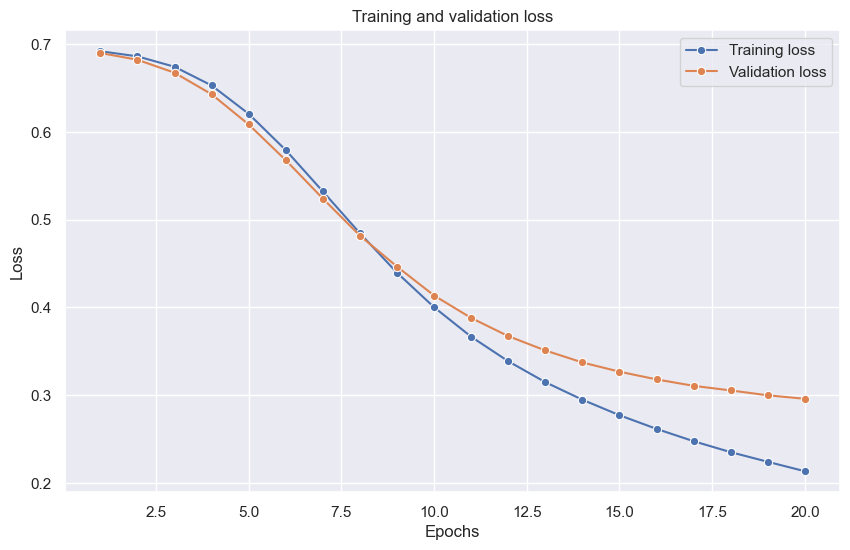

<Figure size 640x480 with 0 Axes>

In [38]:
"""Modelo propuesto"""

vocab_size = 10000

model = keras.Sequential()

# recomendable el ranggo de: 50 y 300
model.add(keras.layers.Embedding(vocab_size, 16))

model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
#model.summary()

"""Configurar el modelo para utilizar un optimizador y una función de pérdida:"""

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

"""Pruebas"""

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

"""Entrenamiento"""

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(test_data, test_labels)

print(results)

history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=epochs, y=loss, marker='o', label='Training loss')
sns.lineplot(x=epochs, y=val_loss, marker='o', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()  

sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=epochs, y=acc, marker='o', label='Training acc')
sns.lineplot(x=epochs, y=val_acc, marker='o', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


